**<h1><center><font size="6">PHÂN TÍCH KHÁM PHÁ DỮ LIỆU</font></center></h1>**

<h2 align="center">
  <b>Dataset:</b> <a href="https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/data">Learning Agency Lab - Automated Essay Scoring 2.0</a>
</h2>

<p align="center">
  <img src="https://www.kaggle.com/competitions/71485/images/header" width="500">
</p>

<br>

# <a id='0'>Mục lục</a>

1. <a href='#1'>Chuẩn bị dữ liệu</a>  
2. <a href='#2'>Khám phá dữ liệu</a>   
    2.1. <a href='#21'>Kiểm tra dữ liệu</a>    
    2.2. <a href='#22'>Phân phối và thống kê dữ liệu</a>   


# 1. <a id='1'>Chuẩn bị dữ liệu</a>  

In [ ]:
!pip install --upgrade pip
!pip install wordcloud==1.9.3
!pip install lexical-diversity
import nltk
nltk.download('stopwords')
nltk.download('punkt')

  Using cached wordcloud-1.9.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (513 kB)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# import sys
# !{sys.executable} - m pip install pyspellchecker
!pip install pyspellchecker

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import requests
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer
from lexical_diversity import lex_div as ld
from bs4 import BeautifulSoup
stem=PorterStemmer()
stop_words=set(stopwords.words('english'))
warnings.filterwarnings("ignore")

# Set the display option
pd.set_option('display.max_colwidth', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [12]:
import re
html = re.compile(r'\'\'')
# find all the html tags in the text

for i in range(0, len(train['full_text'])):
    html_tags = re.findall(html, train['full_text'][i])
    if len(html_tags) > 0:
        print(html_tags)
        print(i)

["''", "''", "''", "''", "''", "''"]
25
["''"]
66
["''"]
79
["''", "''", "''", "''", "''", "''", "''", "''"]
92
["''", "''"]
108
["''", "''", "''", "''", "''"]
131
["''"]
218
["''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''"]
220
["''", "''"]
244
["''"]
251
["''", "''", "''", "''"]
273
["''", "''", "''", "''", "''", "''", "''", "''", "''", "''", "''"]
309
["''", "''"]
312
["''", "''"]
457
["''", "''"]
471
["''", "''"]
489
["''"]
490
["''", "''", "''", "''", "''", "''"]
526
["''", "''"]
545
["''"]
575
["''", "''", "''", "''", "''", "''"]
673
["''", "''"]
754
["''", "''"]
781
["''", "''", "''", "''"]
787
["''", "''"]
802
["''", "''"]
812
["''", "''"]
840
["''", "''"]
887
["''"]
917
["''", "''", "''", "''", "''", "''"]
930
["''", "''"]
944
["''"]
980
["''", "''"]
1218
["''", "''", "''", "''", "''", "''", "''"]
1228
["''"]
1237
["''", "''", "''", "''"]
1340
["''", "''", "''", "''", "''", "''"]
1457
["''", "''"]
1502
["''", "''"]
1576
["''", "''

# 2. <a id='2'> Khám phá dữ liệu</a>  

## 2.1. <a id='21'> Kiểm tra dữ liệu</a>  

### a. Kích thước tập dữ liệu

In [ ]:
print(f'Tập dữ liệu train có: {train.shape[0]} dòng, {train.shape[1]} cột')
print(f'Tập dữ liệu test có: {test.shape[0]} dòng, {test.shape[1]} cột')

Tập dữ liệu train có: 17307 dòng, 3 cột
Tập dữ liệu test có: 3 dòng, 2 cột


### b. Ý nghĩa của các dòng và cột

### c. Kiểu dữ liệu mỗi cột

In [ ]:
train.dtypes

essay_id     object
full_text    object
score         int64
dtype: object

In [ ]:
test.dtypes

essay_id     object
full_text    object
dtype: object

### d. Kiểm tra missing value

In [ ]:
train.isnull().sum()

essay_id     0
full_text    0
score        0
dtype: int64

### e. Kiểm tra trùng lặp

In [ ]:
print(f'Tập dữ liệu train có: {train.duplicated().sum()} dòng trùng lặp')
print(f'Tập dữ liệu test có: {test.duplicated().sum()} dòng trùng lặp')

Tập dữ liệu train có: 0 dòng trùng lặp
Tập dữ liệu test có: 0 dòng trùng lặp


## 2.2. <a id='22'> Phân phối và thống kê dữ liệu</a>  

### a. Dữ liệu numerical

In [ ]:
def lower_quartile(df):
    return df.quantile(0.25)

def upper_quartile(df):
    return df.quantile(0.75)

train.select_dtypes(include='int64').agg(['min', lower_quartile, 'median', upper_quartile, 'max', 'mean'])

,score
min,1.000000
lower_quartile,2.000000
median,3.000000
upper_quartile,4.000000
max,6.000000
mean,2.948402


#### Phân bố của các bài luận theo điểm số

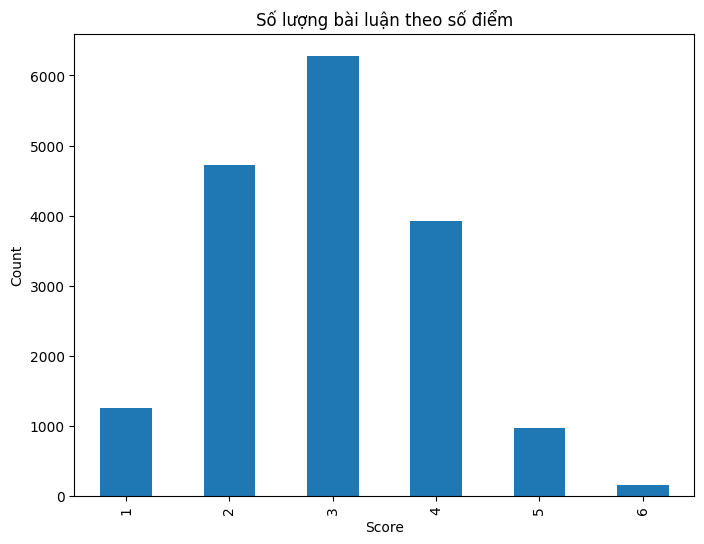

In [ ]:
#Group by score and count the records
df_num = train.groupby('score').size()

#Create a bar chart
df_num.plot(kind='bar', figsize=(8, 6))

plt.title('Số lượng bài luận theo số điểm') 
plt.xlabel('Score') 
plt.ylabel('Count')
plt.show()

**Nhận xét:**

- Phân bố điểm tập trung vào trung bình, khoảng 3-4 điểm rất nhiều. Điểm 6 rất ít.

### b. Dữ liệu categorical

In [ ]:
train.select_dtypes(include='object').head()

,essay_id,full_text
0,000d118,"Many people have car where they live. The thing they don't know is that when you use a car alot of thing can happen like you can get in accidet or the smoke that the car has is bad to breath on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban's families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden on the outskirts of freiburd that near the French and Swiss borders. You probaly won't see a car in Vauban's streets because they are completely ""car free"" but If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states and some where else are suburban life from auto use this is called ""smart planning"". The current efforts to drastically reduce greenhouse gas emissions from tailes the passengee cars are responsible for 12 percent of greenhouse gas emissions in Europe and up to 50 percent in some car intensive in the United States. I honeslty think that good idea that they did that is Vaudan because that makes cities denser and better for walking and in VAUBAN there are 5,500 residents within a rectangular square mile. In the artical David Gold berg said that ""All of our development since World war 2 has been centered on the cars,and that will have to change"" and i think that was very true what David Gold said because alot thing we need cars to do we can go anyway were with out cars beacuse some people are a very lazy to walk to place thats why they alot of people use car and i think that it was a good idea that that they did that in VAUBAN so people can see how we really don't need car to go to place from place because we can walk from were we need to go or we can ride bycles with out the use of a car. It good that they are doing that if you thik about your help the earth in way and thats a very good thing to. In the United states ,the Environmental protection Agency is promoting what is called ""car reduced""communtunties,and the legislators are starting to act,if cautiously. Maany experts expect pubic transport serving suburbs to play a much larger role in a new six years federal transportation bill to approved this year. In previous bill,80 percent of appropriations have by law gone to highways and only 20 percent to other transports. There many good reason why they should do this."
1,000fe60,"I am a scientist at NASA that is discussing the ""face"" on mars. I will be explaining how the ""face"" is a land form. By sharing my information about this isue i will tell you just that.\n\nFirst off, how could it be a martions drawing. There is no plant life on mars as of rite now that we know of, which means so far as we know it is not possible for any type of life. That explains how it could not be made by martians. Also why and how would a martion build a face so big. It just does not make any since that a martian did this.\n\nNext, why it is a landform. There are many landforms that are weird here in America, and there is also landforms all around the whole Earth. Many of them look like something we can relate to like a snake a turtle a human... So if there are landforms on earth dont you think landforms are on mars to? Of course! why not? It's just unique that the landform on Mars looks like a human face. Also if there was martians and they were trying to get our attention dont you think we would have saw one by now?\n\nFinaly, why you should listen to me. You should listen to me because i am a member of NASA and i've been dealing with all of this stuff that were talking about and people who say martians did this have no relation with NASA and hav

In [ ]:
test.select_dtypes(include='object').head()

,essay_id,full_text
0,000d118,"Many people have car where they live. The thing they don't know is that when you use a car alot of thing can happen like you can get in accidet or the smoke that the car has is bad to breath on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban's families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden on the outskirts of freiburd that near the French and Swiss borders. You probaly won't see a car in Vauban's streets because they are completely ""car free"" but If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states and some where else are suburban life from auto use this is called ""smart planning"". The current efforts to drastically reduce greenhouse gas emissions from tailes the passengee cars are responsible for 12 percent of greenhouse gas emissions in Europe and up to 50 percent in some car intensive in the United States. I honeslty think that good idea that they did that is Vaudan because that makes cities denser and better for walking and in VAUBAN there are 5,500 residents within a rectangular square mile. In the artical David Gold berg said that ""All of our development since World war 2 has been centered on the cars,and that will have to change"" and i think that was very true what David Gold said because alot thing we need cars to do we can go anyway were with out cars beacuse some people are a very lazy to walk to place thats why they alot of people use car and i think that it was a good idea that that they did that in VAUBAN so people can see how we really don't need car to go to place from place because we can walk from were we need to go or we can ride bycles with out the use of a car. It good that they are doing that if you thik about your help the earth in way and thats a very good thing to. In the United states ,the Environmental protection Agency is promoting what is called ""car reduced""communtunties,and the legislators are starting to act,if cautiously. Maany experts expect pubic transport serving suburbs to play a much larger role in a new six years federal transportation bill to approved this year. In previous bill,80 percent of appropriations have by law gone to highways and only 20 percent to other transports. There many good reason why they should do this."
1,000fe60,"I am a scientist at NASA that is discussing the ""face"" on mars. I will be explaining how the ""face"" is a land form. By sharing my information about this isue i will tell you just that.\n\nFirst off, how could it be a martions drawing. There is no plant life on mars as of rite now that we know of, which means so far as we know it is not possible for any type of life. That explains how it could not be made by martians. Also why and how would a martion build a face so big. It just does not make any since that a martian did this.\n\nNext, why it is a landform. There are many landforms that are weird here in America, and there is also landforms all around the whole Earth. Many of them look like something we can relate to like a snake a turtle a human... So if there are landforms on earth dont you think landforms are on mars to? Of course! why not? It's just unique that the landform on Mars looks like a human face. Also if there was martians and they were trying to get our attention dont you think we would have saw one by now?\n\nFinaly, why you should listen to me. You should listen to me because i am a member of NASA and i've been dealing with all of this stuff that were talking about and people who say martians did this have no relation with NASA and hav

#### Ta thấy tập dữ liệu test có rất ít dòng và dường như trùng lặp với một trong các dòng của tập train, từ đây ta sẽ chỉ phân tích tập train.csv

In [ ]:
# Thêm cột lenght_text
train['length_text'] = train['full_text'].str.len().astype('int64')
train_copy = train.copy()
train.head()

,essay_id,full_text,score,length_text
0,000d118,"Many people have car where they live. The thing they don't know is that when you use a car alot of thing can happen like you can get in accidet or the smoke that the car has is bad to breath on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban's families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden on the outskirts of freiburd that near the French and Swiss borders. You probaly won't see a car in Vauban's streets because they are completely ""car free"" but If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states and some where else are suburban life from auto use this is called ""smart planning"". The current efforts to drastically reduce greenhouse gas emissions from tailes the passengee cars are responsible for 12 percent of greenhouse gas emissions in Europe and up to 50 percent in some car intensive in the United States. I honeslty think that good idea that they did that is Vaudan because that makes cities denser and better for walking and in VAUBAN there are 5,500 residents within a rectangular square mile. In the artical David Gold berg said that ""All of our development since World war 2 has been centered on the cars,and that will have to change"" and i think that was very true what David Gold said because alot thing we need cars to do we can go anyway were with out cars beacuse some people are a very lazy to walk to place thats why they alot of people use car and i think that it was a good idea that that they did that in VAUBAN so people can see how we really don't need car to go to place from place because we can walk from were we need to go or we can ride bycles with out the use of a car. It good that they are doing that if you thik about your help the earth in way and thats a very good thing to. In the United states ,the Environmental protection Agency is promoting what is called ""car reduced""communtunties,and the legislators are starting to act,if cautiously. Maany experts expect pubic transport serving suburbs to play a much larger role in a new six years federal transportation bill to approved this year. In previous bill,80 percent of appropriations have by law gone to highways and only 20 percent to other transports. There many good reason why they should do this.",3,2677
1,000fe60,"I am a scientist at NASA that is discussing the ""face"" on mars. I will be explaining how the ""face"" is a land form. By sharing my information about this isue i will tell you just that.\n\nFirst off, how could it be a martions drawing. There is no plant life on mars as of rite now that we know of, which means so far as we know it is not possible for any type of life. That explains how it could not be made by martians. Also why and how would a martion build a face so big. It just does not make any since that a martian did this.\n\nNext, why it is a landform. There are many landforms that are weird here in America, and there is also landforms all around the whole Earth. Many of them look like something we can relate to like a snake a turtle a human... So if there are landforms on earth dont you think landforms are on mars to? Of course! why not? It's just unique that the landform on Mars looks like a human face. Also if there was martians and they were trying to get our attention dont you think we would have saw one by now?\n\nFinaly, why you should listen to me. You should listen to me because i am a member of NASA and i've been dealing with all of this stuff that were talking about and people who say martians did this have no r

#### Tạo các hàm loại bỏ làm sạch văn bản

##### Loại bỏ dấu câu

In [ ]:
#Function to keep only words containing letters A-Z and a-z. 
#This will remove all punctuations, special characters etc. https://stackoverflow.com/a/5843547/4084039
def removePunctuations(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return (cleaned_text)

removePunctuations("fsd*?~,,,( sdfsdfdsvv)#")

'fsd        sdfsdfdsvv  '

##### Loại bỏ Stopwords

In [ ]:
def removeStopwords(sentence):
    word_tokens = word_tokenize(sentence)
    # converts the words in word_tokens to lower case and then checks whether 
    #they are present in stop_words or not
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    
    return ' '.join(filtered_sentence)

print(removeStopwords("This is a sample sentence, showing off the stop words filtration."))

sample sentence , showing stop words filtration .


In [ ]:
# Apply removal functions
train['full_text_clean'] = train['full_text'].apply(removePunctuations).apply(removeStopwords)
train.head()

,essay_id,full_text,score,length_text,full_text_clean
0,000d118,"Many people have car where they live. The thing they don't know is that when you use a car alot of thing can happen like you can get in accidet or the smoke that the car has is bad to breath on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban's families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden on the outskirts of freiburd that near the French and Swiss borders. You probaly won't see a car in Vauban's streets because they are completely ""car free"" but If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states and some where else are suburban life from auto use this is called ""smart planning"". The current efforts to drastically reduce greenhouse gas emissions from tailes the passengee cars are responsible for 12 percent of greenhouse gas emissions in Europe and up to 50 percent in some car intensive in the United States. I honeslty think that good idea that they did that is Vaudan because that makes cities denser and better for walking and in VAUBAN there are 5,500 residents within a rectangular square mile. In the artical David Gold berg said that ""All of our development since World war 2 has been centered on the cars,and that will have to change"" and i think that was very true what David Gold said because alot thing we need cars to do we can go anyway were with out cars beacuse some people are a very lazy to walk to place thats why they alot of people use car and i think that it was a good idea that that they did that in VAUBAN so people can see how we really don't need car to go to place from place because we can walk from were we need to go or we can ride bycles with out the use of a car. It good that they are doing that if you thik about your help the earth in way and thats a very good thing to. In the United states ,the Environmental protection Agency is promoting what is called ""car reduced""communtunties,and the legislators are starting to act,if cautiously. Maany experts expect pubic transport serving suburbs to play a much larger role in a new six years federal transportation bill to approved this year. In previous bill,80 percent of appropriations have by law gone to highways and only 20 percent to other transports. There many good reason why they should do this.",3,2677,Many people car live thing know use car alot thing happen like get accidet smoke car bad breath someone walk VAUBAN Germany dont proble percent vauban families cars percent sold car move Street parkig driveways home garages forbidden outskirts freiburd near French Swiss borders probaly see car Vauban streets completely car free lives VAUBAN owns car ownership allowed two places park large garages edge development car owner buys space cheap buy one sell space car along home vauban people completed said example growing trend Europe untile states else suburban life auto use called smart planning current efforts drastically reduce greenhouse gas emissions tailes passengee cars responsible percent greenhouse gas emissions Europe percent car intensive United States honeslty think good idea Vaudan makes cities denser better walking VAUBAN residents within rectangular square mile artical David Gold berg said development since World war centered cars change think true David Gold said alot thing need cars go anyway cars beacuse people lazy walk place thats alot people use car think good idea VAUBAN people see really need car go place place walk need go ride bycles use car good thik help earth way thats good thing United states Environm

#### [1] Phân bố của điểm số các bài luận theo độ dài 

Tạo thêm cột `counts` đếm số lượng từ trong một `full_text`.

In [ ]:
# Ensure 'length_text' is a float and fill NaN values with 0
train['length_text'] = train['full_text'].str.split().str.len().fillna(0).astype('float')

# Define the bins
bins = np.arange(0, train['length_text'].max() + 500, 500)

# Create a new column 'length_text_range' that categorizes 'length_text' into ranges
train['length_text_range'] = pd.cut(train['length_text'], bins=bins).astype(str)

# Group by 'length_text_range' and 'score', and count the records
df = train.groupby(['length_text_range', 'score']).size().reset_index(name='counts')
df

,length_text_range,score,counts
0,"(0.0, 500.0]",1,1203
1,"(0.0, 500.0]",2,4616
2,"(0.0, 500.0]",3,5804
3,"(0.0, 500.0]",4,2572
4,"(0.0, 500.0]",5,142
5,"(0.0, 500.0]",6,1
6,"(1000.0, 1500.0]",2,3
7,"(1000.0, 1500.0]",3,4
8,"(1000.0, 1500.0]",4,9
9,"(1000.0, 1500.0]",5,11


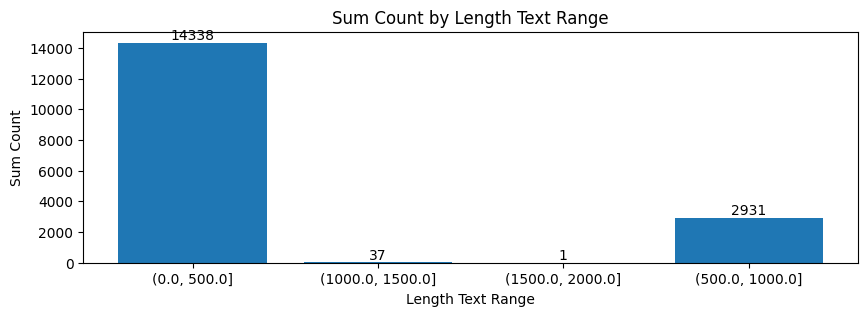

In [ ]:
# Skip if there are no groups
if len(df['length_text_range'].unique()) == 0:
    print("No groups to plot.")
else:
    # Calculate the number of subplots needed
    n = len(df['length_text_range'].unique())
    n_cols = 4
    n_rows = n // n_cols if n % n_cols == 0 else n // n_cols + 1

    # Create a matrix of subplots
    fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[str(i) for i in df['length_text_range'].unique()], specs=[[{'type': 'pie'}]*n_cols]*n_rows)

    # Create a pie chart for each 'length_text_range'
    for i, length_text_range in enumerate(df['length_text_range'].unique()):
        data = df[df['length_text_range'] == length_text_range]
        if not data.empty and data['counts'].sum() > 0:
            row = i // n_cols + 1
            col = i % n_cols + 1
            fig.add_trace(go.Pie(labels=data['score'], values=data['counts'], name="Score", rotation=0), row=row, col=col)

    fig.update_layout(height=400*n_rows, width=300*n_cols, title_text="Distribution of Score by Length Text")
    fig.show()
    
# Calculate the sum count for each interval
sum_counts = df.groupby('length_text_range')['counts'].sum()

# Create a bar chart
plt.figure(figsize=(10, 3))
bars = plt.bar(sum_counts.index, sum_counts.values)
plt.xlabel('Length Text Range')
plt.ylabel('Sum Count')
plt.title('Sum Count by Length Text Range')

# Add count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.show()

**Nhận xét:**
- Những bài luận có độ dài càng lớn thì số điểm thấp càng ít.
- Ở các bài luận (0-500] từ chỉ có 0.00697% được điểm 6 dù số lượng bài luận trong khoảng này rất lớn, trong khi (1000-1500] từ thì chiếm 27% điểm 6.
- Hầu như các luận trên 1000 từ không có điểm 1.
- Các luận (500-1000] rất đa dạng điểm, số lượng bài điểm 4, 5 chiếm đa số.
- Các luận (1000-1500] phân bố điểm khá đều và không có điểm 1 cùng với số lượng khá ít cho thấy chất lượng có thể được đo đạc theo lượng từ trong bài. 

=> Có thể thấy phần lớn bài luận có số lượng từ vựng nhiều sẽ có điểm số cao hơn.

Tuy nhiên khoảng (1500-2000] từ chỉ có một bài đạt điểm 2 không thể hiện được phán đoán gì. Ta xem thử bài văn này có nội dung như thế nào.

In [ ]:
print(train[train['length_text']>=1500]['full_text'].values[0])

I thought it might be boring and a lot of work on board herding animals but its alot more to it than that. Its a wonderful job becuase you do not only get paid but you get to go sight seeing, see places you never been before, work with animals, and lets not forget help people. This job changed my life within a second of being on board i use to work at a boring old bank and grocery store now I know I made the right chose choosing to work here I knew I wouldnt have a chance like this again so I took it with out a doubt. Mayby you might want to travel the world and see new amazing places and see ancient palaces ike Geece and at the same time help people in need. I thought it might be boring and a lot of work on board herding animals but its alot more to it than that. Its a wonderful job becuase you do not only get paid but you get to go sight seeing, see places you never been before, work with animals, and lets not forget help people. This job changed my life within a second of being on b

#### [2] Kiểm tra các bài luận có chứa từ vựng sai chính tả, liệu điều này có ảnh hưởng đến điểm số không

In [ ]:
# Initialize the spell checker
spell = SpellChecker()

def count_misspelled(text):
    # Split the text into words
    words = text.split()
    # Find the misspelled words
    misspelled = spell.unknown(words)
    # print(misspelled)
    # Return the count of misspelled words
    return len(misspelled)

print(count_misspelled(train[train['length_text']>=1500]['full_text'].values[0]))

13


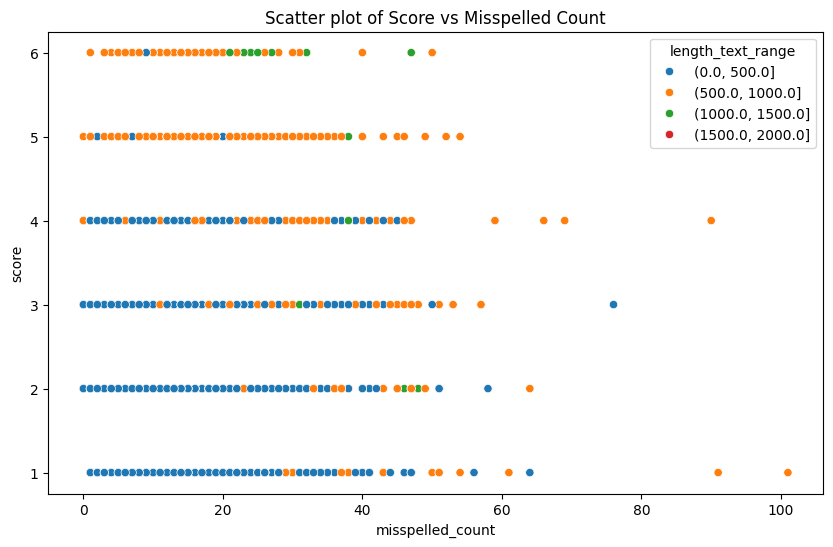

In [ ]:
# Apply the function to the 'full_text' column and create new column
train['misspelled_count'] = train['full_text_clean'].apply(count_misspelled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='misspelled_count', y='score', hue='length_text_range', data=train)
plt.title('Scatter plot of Score vs Misspelled Count')
plt.show()

**Nhận xét:**

- Hầu như các bài luận được điểm càng cao thì càng mắc ít lỗi chính tả.
- Các điểm ngoại lai (các bài mắc rất nhiều lỗi - khoảng trên 60 lỗi) thuộc nhóm (500-1000] từ, những có vẻ là do số lượng bài luận trong khoảng này quá lớn.


#### [3] WordCloud 

WordCloud cho toàn bộ dữ liệu

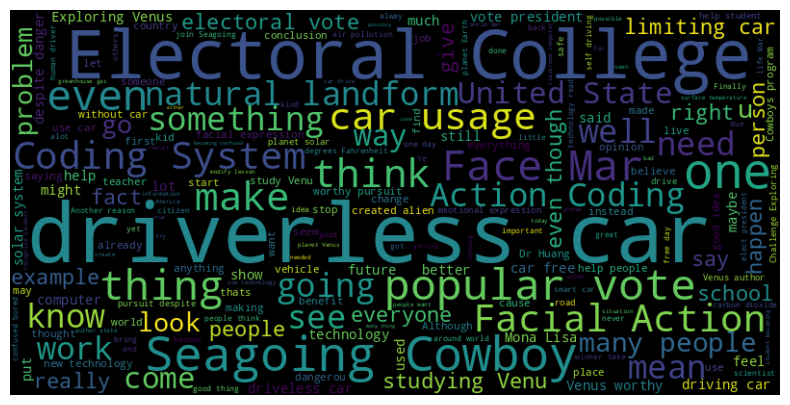

In [ ]:
# Combine all the 'full_text_clean' into a single string
text = ' '.join(train['full_text_clean'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Nhận xét:**
- Có thể thấy chủ đề của các bài luận xoay quanh `driverless car`, `Electoral College`, `Seagoing Cowboy`, `Coding System`, `Face Mar`,...
Ta xem xét bigram của các bài luận có score là 6 và 1 để so sánh. 

In [ ]:
def bigrams(score):
    df = train[train['score']==score]

    # Initialize the CountVectorizer with ngram_range set to (2, 2) for bigrams
    vectorizer = CountVectorizer(ngram_range=(2, 2))

    # Fit and transform the 'full_text_clean' column
    X = vectorizer.fit_transform(df['full_text_clean'])

    # Get the feature names (bigrams) and their counts
    bigrams = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1

    # Combine the bigrams and counts into a DataFrame
    df_bigrams = pd.DataFrame({'bigram': bigrams, 'count': counts})

    # Sort the DataFrame by count in descending order and get the top 10 bigrams
    top_bigrams = df_bigrams.sort_values(by='count', ascending=False).head(10)

    return top_bigrams

# print(bigrams(6))
# print(bigrams(1))

                  bigram  count
11572  electoral college    379
14151      facial action    134
435        action coding    131
28101       popular vote    131
6741       coding system    130
14017          face mars     82
13685    exploring venus     78
36349     studying venus     70
10578           dr huang     69
10706    driverless cars     69
                   bigram  count
21089   electoral college    729
45413           mona lisa    282
76285       united states    240
65227        solar system    235
79008      vote president    168
53635        planet solar    166
9686       carbon dioxide    164
53423        planet earth    155
54551        popular vote    151
17265  degrees fahrenheit    146


In [ ]:
#  # Get the top bigrams for the two scores
# bigrams6 = bigrams(6)
# bigrams1 = bigrams(1)

# # Create a new figure
# plt.figure(figsize=(20, 10))

# # Create the first subplot for the first score
# plt.subplot(1, 2, 1)
# plt.barh(bigrams6['bigram'], bigrams6['count'], color='blue')
# plt.title(f'Top Bigrams for Score 6')
# plt.xlabel('Count')
# plt.ylabel('Bigram')

# # Create the second subplot for the second score
# plt.subplot(1, 2, 2)
# plt.barh(bigrams1['bigram'], bigrams1['count'], color='red')
# plt.title(f'Top Bigrams for Score 1')
# plt.xlabel('Count')
# plt.ylabel('Bigram')

# # Display the plots
# plt.tight_layout()
# plt.show()

#### [4]  Phân tích cảm xúc (Sentiment Analysis)

In [ ]:
from textblob import TextBlob

In [ ]:
# Funtion to compute sentiment scores
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# apply into 'full_text' of train datasets
train['sentiment'] = train['full_text'].apply(get_sentiment_score)

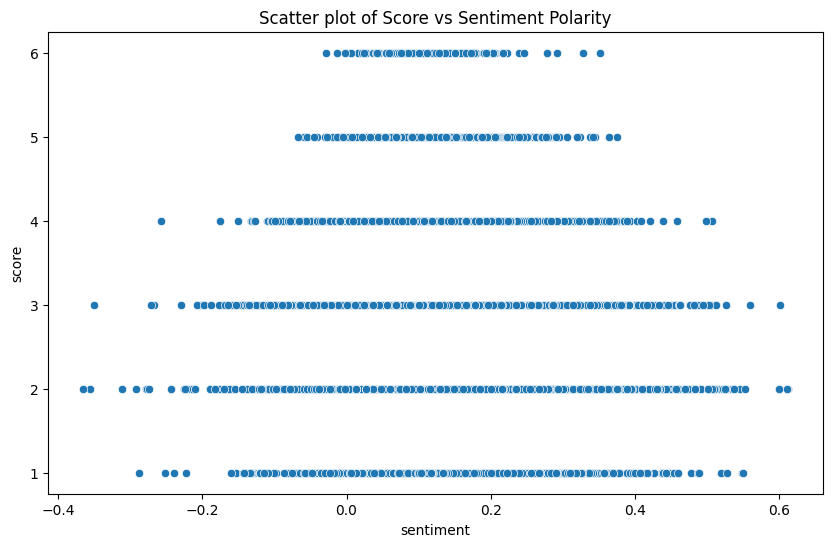

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='score',data=train)
plt.title('Scatter plot of Score vs Sentiment Polarity')
plt.show()

**Nhận xét:**
- Nếu xét các mức sentiment <0: Thì nhận thấy các bài essay điểm càng cao thì có sentiment càng cao.
- Ngược lại ở các mức sentiment >0: Hầu như các bài essay điểm càng thấp thì có sentiment càng cao.
=> Càng bài essay điểm càng cao có miền sentiment càng thấp.

##### [5] Phân tích độ đa dạng từ vựng 

In [ ]:
def get_Simple_TTR(text):
    flt = ld.flemmatize(text)
    return ld.ttr(flt)
train['simple_ttr']=train['full_text'].apply(get_Simple_TTR)

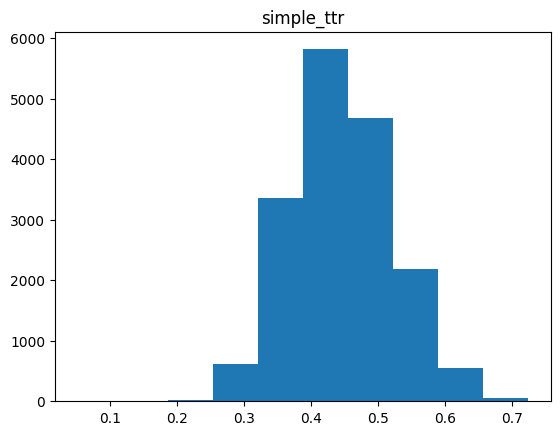

In [ ]:
train.hist(column=['simple_ttr'],grid=False)
plt.show()

Nhận xét: Đa phần các bài essay có chỉ số đa dạng từ vựng (Simple TTR) phân bố nhiều ở khoảng (0.4-0.5) .Ta hãy cùng xem mối tương quan giữa chúng với điểm số của các bài essay.

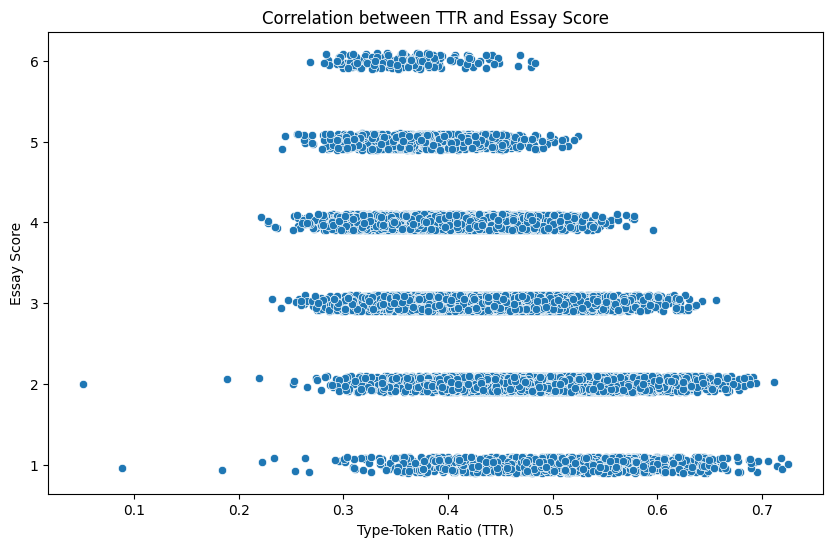

In [ ]:
# Thêm jitter vào điểm số để tránh các điểm trùng lặp
df=train.copy()
df['score'] = df['score'] + np.random.uniform(-0.1, 0.1, size=len(df))

# Tạo biểu đồ phân tán
plt.figure(figsize=(10, 6))
sns.scatterplot(x='simple_ttr', y='score', data=df)

# Thiết lập tiêu đề và nhãn
plt.title('Correlation between TTR and Essay Score')
plt.xlabel('Type-Token Ratio (TTR)')
plt.ylabel('Essay Score')

# Hiển thị biểu đồ
plt.show()

**Nhận xét:**
- Không có mối quan hệ tỉ lệ thuận giữa điểm số và độ đa dạng từ vựng .Trong trường hợp datasets này có thể có cách chấm điểm không dựa vào độ đa dạng từ hoặc có thể các bài có nhiều từ nhưng tác giả lại sử dụng sai ngữ cảnh dẫn đến điểm có thể sẽ không cao.
- Tuy nhiên để đạt điểm cao (từ điểm 5 trở lên) thì hầu như các bài essay phải có chỉ số `Simple TTR` từ điểm 0.25 trở lên.

#### [6] Phân tích độ khó từ vựng

In [ ]:
def get_first_level_of_word(word):
    url=f'https://dictionary.cambridge.org/vi/dictionary/english/{word}'
    user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36"
    headers = {'User-Agent': user_agent}
    try:
        web_request = requests.get(url, headers=headers)
    except:
        return None
    soup = BeautifulSoup(web_request.text, "html.parser")
    list_check=[' A1',' A2',' B1',' B2',' C1',' C2']
    for level in list_check:
        element= soup.find('span', class_='epp-xref dxref'+level)
        if element is not None:
            return element.text
            break
    return None

In [ ]:
df_copy=train.copy()
df_copy[['A1','A2','B1','B2','C1','C2']]=0.0
df_copy

,essay_id,full_text,score,length_text,full_text_clean,length_text_range,misspelled_count,sentiment,simple_ttr,A1,A2,B1,B2,C1,C2
0,000d118,"Many people have car where they live. The thing they don't know is that when you use a car alot of thing can happen like you can get in accidet or the smoke that the car has is bad to breath on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban's families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden on the outskirts of freiburd that near the French and Swiss borders. You probaly won't see a car in Vauban's streets because they are completely ""car free"" but If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states and some where else are suburban life from auto use this is called ""smart planning"". The current efforts to drastically reduce greenhouse gas emissions from tailes the passengee cars are responsible for 12 percent of greenhouse gas emissions in Europe and up to 50 percent in some car intensive in the United States. I honeslty think that good idea that they did that is Vaudan because that makes cities denser and better for walking and in VAUBAN there are 5,500 residents within a rectangular square mile. In the artical David Gold berg said that ""All of our development since World war 2 has been centered on the cars,and that will have to change"" and i think that was very true what David Gold said because alot thing we need cars to do we can go anyway were with out cars beacuse some people are a very lazy to walk to place thats why they alot of people use car and i think that it was a good idea that that they did that in VAUBAN so people can see how we really don't need car to go to place from place because we can walk from were we need to go or we can ride bycles with out the use of a car. It good that they are doing that if you thik about your help the earth in way and thats a very good thing to. In the United states ,the Environmental protection Agency is promoting what is called ""car reduced""communtunties,and the legislators are starting to act,if cautiously. Maany experts expect pubic transport serving suburbs to play a much larger role in a new six years federal transportation bill to approved this year. In previous bill,80 percent of appropriations have by law gone to highways and only 20 percent to other transports. There many good reason why they should do this.",3,498.0,Many people car live thing know use car alot thing happen like get accidet smoke car bad breath someone walk VAUBAN Germany dont proble percent vauban families cars percent sold car move Street parkig driveways home garages forbidden outskirts freiburd near French Swiss borders probaly see car Vauban streets completely car free lives VAUBAN owns car ownership allowed two places park large garages edge development car owner buys space cheap buy one sell space car along home vauban people completed said example growing trend Europe untile states else suburban life auto use called smart planning current efforts drastically reduce greenhouse gas emissions tailes passengee cars responsible percent greenhouse gas emissions Europe percent car intensive United States honeslty think good idea Vaudan makes cities denser better walking VAUBAN residents within rectangular square mile artical David Gold berg said development since World war centered cars change think true David Gold said alot thing need cars go anyway cars beacuse people lazy walk place thats alot people use car think good idea VAUBAN people see really need car go place place walk need go ride bycl

In [ ]:
def get_Simple_TTR(text):
    flt = ld.flemmatize(text)
    return ld.ttr(flt)
def get_level_of_words(text,df,row):
    df.columns
    text=text.lower()
    words=word_tokenize(test_text)
    misspelled=spell.unknown(words)
    words = [item for item in words if item not in misspelled]
    for word in words:
        level_of_words=get_first_level_of_word(word)
        if level_of_words is not None:
            df[level_of_words.strip()][row]+=1
    

In [ ]:
for idx,text in enumerate(df_copy['full_text_clean']):
    get_level_of_words(text,df_copy,idx)

KernelInterrupted: Execution interrupted by the Jupyter kernel.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8162a663-b5ba-47ef-8673-0fefcd4eb82c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>